# **IBM DATA SCIENCE CAPSTONE PROJECT**

## **CAR ACCIDENT SEVERITY**

### **This notebook contains the code for the Data Science Capstone Project.**
### **It only consists of code and the steps involved throughout the project.**
### **In order to dive deep in understanding, reasoning, please click below link.**

[Project Link](https://github.com/Himagination/Coursera_Capstone.git)

# **1. DATA UNDERSTANDING**

In [24]:
#Importing data from IBM Cloud Storage
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_0d60702c96f04476af2b6090c652117f = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='haAlMk20BSk_XeHAMUStCwYYQ0ICqbRr2NRAJZ3N432K',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_0d60702c96f04476af2b6090c652117f.get_object(Bucket='fashionmnistclassificationasseign-donotdelete-pr-tcuiwsnh5w2bsk',Key='Collisions.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)

In [25]:
#Importing Libraries
import numpy as np
import pandas as pd

In [26]:
#Reading csv Data into a Dataframe
# url = 'https://opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv'
# filename = wget.download(url)
# df = pd.read_csv(filename)
df_shape_default = df.shape
print("Shape of the original data frame: "+str(df.shape[0])+' x '+str(df.shape[1]))

Shape of the original data frame: 221389 x 40


In [27]:
#Displaying first few rows for a quick inspection
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head()

X          Y  OBJECTID  INCKEY  COLDETKEY   REPORTNO     STATUS  \
0 -122.320757  47.609408         1  328476     329976    EA08706    Matched   
1 -122.319561  47.662221         2  328142     329642    EA06882    Matched   
2 -122.327525  47.604393         3   20700      20700    1181833  Unmatched   
3 -122.327525  47.708622         4  332126     333626  M16001640  Unmatched   
4 -122.292120  47.559009         5  328238     329738    3857118  Unmatched   

  ADDRTYPE  INTKEY                                           LOCATION  \
0    Block     NaN    BROADWAY BETWEEN E COLUMBIA ST AND BOYLSTON AVE   
1    Block     NaN     8TH AVE NE BETWEEN NE 45TH E ST AND NE 47TH ST   
2    Block     NaN               JAMES ST BETWEEN 6TH AVE AND 7TH AVE   
3    Block     NaN  NE NORTHGATE WAY BETWEEN 1ST AVE NE AND NE NOR...   
4    Block     NaN  M L KING JR ER WAY S BETWEEN S ANGELINE ST AND...   

  EXCEPTRSNCODE EXCEPTRSNDESC SEVERITYCODE                    SEVERITYDESC  \
0                         NaN            1  Property Damage Only Collision   
1                         NaN            1  Property Damage Only Collision   
2           NaN           NaN            0                         Unknown   
3                         NaN            0                         Unknown   
4                         NaN            0                         Unknown   

  COLLISIONTYPE  PERSONCOUNT  PEDCOUNT  PEDCYLCOUNT  VEHCOUNT  INJURIES  \
0     Sideswipe            2         0            0         2         0   
1    Parked Car            2         0            0         2         0   
2           NaN            0         0            0         0         0   
3           NaN            0         0            0         0         0   
4           NaN            0         0            0         0         0   

   SERIOUSINJURIES  FATALITIES                 INCDATE               INCDTTM  \
0                0           0  2020/01/22 00:00:00+00  1/22/2020 3:21:00 PM   
1                0           0  2020/01/07 00:00:00+00   1/7/2020 8:00:00 AM   
2                0           0  2004/01/30 00:00:00+00             1/30/2004   
3                0           0  2016/01/23 00:00:00+00             1/23/2016   
4                0           0  2020/01/26 00:00:00+00             1/26/2020   

                              JUNCTIONTYPE  SDOT_COLCODE  \
0  Mid-Block (not related to intersection)          11.0   
1  Mid-Block (not related to intersection)          15.0   
2     Mid-Block (but intersection related)          11.0   
3  Mid-Block (not related to intersection)          11.0   
4  Mid-Block (not related to intersection)          28.0   

                                        SDOT_COLDESC INATTENTIONIND UNDERINFL  \
0  MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...            NaN         N   
1  MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE...            NaN         N   
2  MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...            NaN       NaN   
3  MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...            NaN       NaN   
4      MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT            NaN       NaN   

   WEATHER ROADCOND                LIGHTCOND PEDROWNOTGRNT  SDOTCOLNUM  \
0  Raining      Wet  Dark - Street Lights On           NaN         NaN   
1    Clear      Dry                 Daylight           NaN         NaN   
2      NaN      NaN                      NaN           NaN   4030032.0   
3      NaN      NaN                      NaN           NaN         NaN   
4      NaN      NaN                      NaN           NaN         NaN   

  SPEEDING ST_COLCODE                                         ST_COLDESC  \
0      NaN         11  From same direction - both going straight - bo...   
1      NaN         32                             One parked--one moving   
2      NaN        NaN                                                NaN   
3      NaN                                                           NaN   
4      NaN              

In [28]:
#Checking all datatypes
df.dtypes

X                  float64
Y                  float64
OBJECTID             int64
INCKEY               int64
COLDETKEY            int64
REPORTNO            object
STATUS              object
ADDRTYPE            object
INTKEY             float64
LOCATION            object
EXCEPTRSNCODE       object
EXCEPTRSNDESC       object
SEVERITYCODE        object
SEVERITYDESC        object
COLLISIONTYPE       object
PERSONCOUNT          int64
PEDCOUNT             int64
PEDCYLCOUNT          int64
VEHCOUNT             int64
INJURIES             int64
SERIOUSINJURIES      int64
FATALITIES           int64
INCDATE             object
INCDTTM             object
JUNCTIONTYPE        object
SDOT_COLCODE       float64
SDOT_COLDESC        object
INATTENTIONIND      object
UNDERINFL           object
WEATHER             object
ROADCOND            object
LIGHTCOND           object
PEDROWNOTGRNT       object
SDOTCOLNUM         float64
SPEEDING            object
ST_COLCODE          object
ST_COLDESC          object
S

In [29]:
column_types = df.columns.to_series().groupby(df.dtypes).groups
column_types

{dtype('int64'): Index(['OBJECTID', 'INCKEY', 'COLDETKEY', 'PERSONCOUNT', 'PEDCOUNT',
        'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES', 'FATALITIES',
        'SEGLANEKEY', 'CROSSWALKKEY'],
       dtype='object'),
 dtype('float64'): Index(['X', 'Y', 'INTKEY', 'SDOT_COLCODE', 'SDOTCOLNUM'], dtype='object'),
 dtype('O'): Index(['REPORTNO', 'STATUS', 'ADDRTYPE', 'LOCATION', 'EXCEPTRSNCODE',
        'EXCEPTRSNDESC', 'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE',
        'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLDESC', 'INATTENTIONIND',
        'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT',
        'SPEEDING', 'ST_COLCODE', 'ST_COLDESC', 'HITPARKEDCAR'],
       dtype='object')}

In [30]:
#Checking the number of NaNs
print(df.isnull().sum(axis=0))

X                    7471
Y                    7471
OBJECTID                0
INCKEY                  0
COLDETKEY               0
REPORTNO                0
STATUS                  0
ADDRTYPE             3712
INTKEY             149505
LOCATION             4588
EXCEPTRSNCODE      120403
EXCEPTRSNDESC      209610
SEVERITYCODE            1
SEVERITYDESC            0
COLLISIONTYPE       26230
PERSONCOUNT             0
PEDCOUNT                0
PEDCYLCOUNT             0
VEHCOUNT                0
INJURIES                0
SERIOUSINJURIES         0
FATALITIES              0
INCDATE                 0
INCDTTM                 0
JUNCTIONTYPE        11972
SDOT_COLCODE            1
SDOT_COLDESC            1
INATTENTIONIND     191201
UNDERINFL           26210
WEATHER             26420
ROADCOND            26339
LIGHTCOND           26509
PEDROWNOTGRNT      216197
SDOTCOLNUM          94184
SPEEDING           211461
ST_COLCODE           9413
ST_COLDESC          26230
SEGLANEKEY              0
CROSSWALKKEY

In [31]:
#Storing percentage of null values for each attributes.
null_series = ((df.isnull().sum(axis=0)/221388) * 100).round(0).to_dict()
null_series

{'X': 3.0,
 'Y': 3.0,
 'OBJECTID': 0.0,
 'INCKEY': 0.0,
 'COLDETKEY': 0.0,
 'REPORTNO': 0.0,
 'STATUS': 0.0,
 'ADDRTYPE': 2.0,
 'INTKEY': 68.0,
 'LOCATION': 2.0,
 'EXCEPTRSNCODE': 54.0,
 'EXCEPTRSNDESC': 95.0,
 'SEVERITYCODE': 0.0,
 'SEVERITYDESC': 0.0,
 'COLLISIONTYPE': 12.0,
 'PERSONCOUNT': 0.0,
 'PEDCOUNT': 0.0,
 'PEDCYLCOUNT': 0.0,
 'VEHCOUNT': 0.0,
 'INJURIES': 0.0,
 'SERIOUSINJURIES': 0.0,
 'FATALITIES': 0.0,
 'INCDATE': 0.0,
 'INCDTTM': 0.0,
 'JUNCTIONTYPE': 5.0,
 'SDOT_COLCODE': 0.0,
 'SDOT_COLDESC': 0.0,
 'INATTENTIONIND': 86.0,
 'UNDERINFL': 12.0,
 'WEATHER': 12.0,
 'ROADCOND': 12.0,
 'LIGHTCOND': 12.0,
 'PEDROWNOTGRNT': 98.0,
 'SDOTCOLNUM': 43.0,
 'SPEEDING': 96.0,
 'ST_COLCODE': 4.0,
 'ST_COLDESC': 12.0,
 'SEGLANEKEY': 0.0,
 'CROSSWALKKEY': 0.0,
 'HITPARKEDCAR': 0.0}

In [32]:
#Inspecting target variable - Severity Code data
df['SEVERITYCODE'].value_counts()

1     137596
2      58747
0      21594
2b      3102
3        349
Name: SEVERITYCODE, dtype: int64

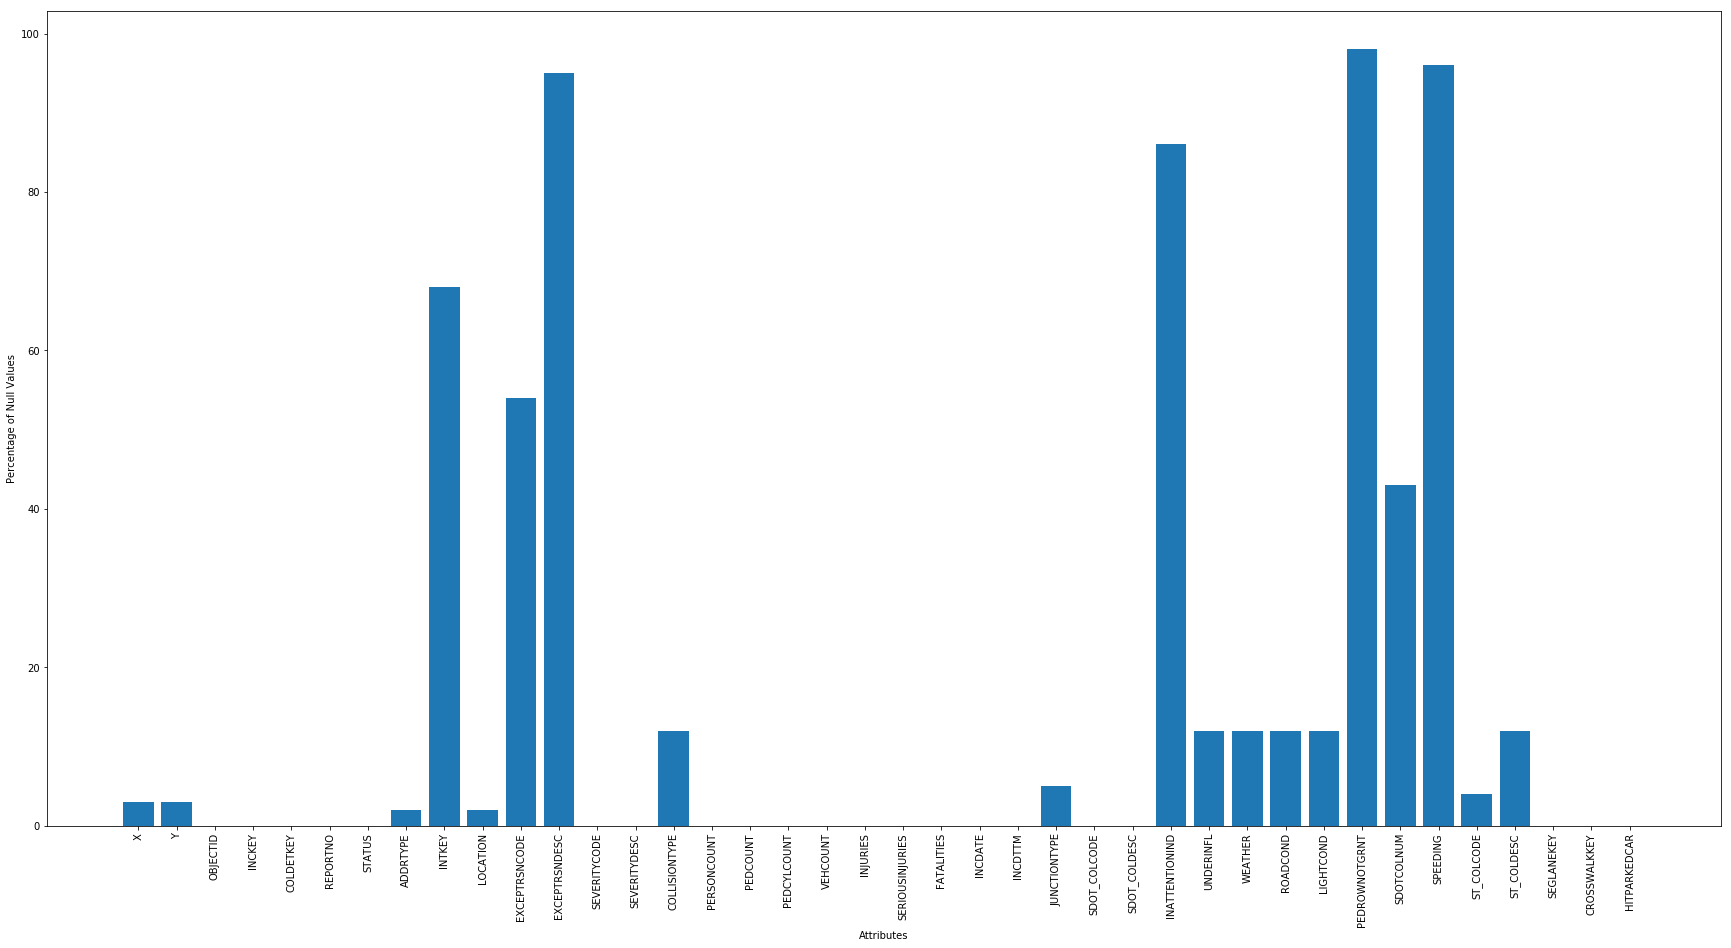

In [33]:
#Plotting the percentage of null percentages for observation.
%matplotlib inline
import matplotlib.pyplot as plt
Attributes = null_series.keys()
Null_values = null_series.values()
plt.figure(figsize=(30,15))
plt.xlabel("Attributes")
plt.ylabel("Percentage of Null Values")
plt.bar(Attributes, Null_values)
plt.xticks(rotation=90)
plt.show()

In [34]:
#Inspecting 'SEVERITYDESC' for 'UNKNOWN'
df['SEVERITYDESC'].value_counts()

Property Damage Only Collision    137596
Injury Collision                   58747
Unknown                            21595
Serious Injury Collision            3102
Fatality Collision                   349
Name: SEVERITYDESC, dtype: int64

In [35]:
#Inspecting relation between Weather, Roadcondition, Lightcondition with SeverityCode.
df_null = df[['SEVERITYCODE', 'WEATHER', 'ROADCOND', 'LIGHTCOND']].copy()
df_null[df_null.WEATHER.isnull()]

SEVERITYCODE WEATHER       ROADCOND                 LIGHTCOND
2                 0     NaN            NaN                       NaN
3                 0     NaN            NaN                       NaN
4                 0     NaN            NaN                       NaN
7                 0     NaN            NaN                       NaN
14                1     NaN            NaN                       NaN
15                1     NaN            NaN                       NaN
19                0     NaN            NaN                       NaN
25                0     NaN            NaN                       NaN
41                1     NaN            NaN                       NaN
52                0     NaN            NaN                       NaN
55                2     NaN            NaN                       NaN
60                0     NaN            NaN                       NaN
65                1     NaN            NaN                       NaN
67                1     NaN            NaN                       NaN
68                1     NaN            NaN                       NaN
70                0     NaN            NaN                       NaN
72                1     NaN            NaN                       NaN
74                1     NaN            NaN                       NaN
82                1     NaN            NaN                       NaN
89                0     NaN            NaN                       NaN
94                0     NaN            NaN                       NaN
99                1     NaN            Dry   Dark - Street Lights On
108               0     NaN            NaN                       NaN
111               0     NaN            NaN                       NaN
115               1     NaN            NaN                       NaN
123               0     NaN            NaN                       NaN
124               0     NaN            NaN                       NaN
129               0     NaN            NaN                       NaN
134               1     NaN            NaN                       NaN
136               1     NaN            NaN                       NaN
138               1     NaN            NaN                       NaN
145               0     NaN            NaN                       NaN
150               1     NaN            NaN                       NaN
151               0     NaN            NaN                       NaN
153               1     NaN            NaN                       NaN
164               2     NaN            NaN                       NaN
166               0     NaN            NaN                       NaN
167               0     NaN            NaN                       NaN
174               0     NaN            NaN                       NaN
175               0     NaN            NaN                       NaN
178               1     NaN            NaN                       NaN
179               2     NaN            Wet   Dark - Street Lights On
180               0     NaN            NaN                       NaN
181               0     NaN            NaN                       NaN
187               1     NaN            Wet   Dark - Street Lights On
189               1     NaN            NaN                       NaN
198               0     NaN            NaN                       NaN
202               0     NaN            NaN                       NaN
203               0     NaN            NaN                       NaN
208               2     NaN            NaN                       NaN
210               0     NaN            NaN                       NaN
212               1     NaN            NaN                       NaN
219               0     NaN            NaN                       NaN
222               1     NaN            NaN                       NaN
226               1     NaN            NaN                       NaN
234               0     NaN            NaN                       NaN
237               1     NaN            NaN                       NaN
244  

In [36]:
#Inspecting relation between co-ordinates with othere attributes
df_null2 = df_null = df[['SEVERITYCODE', 'X', 'Y', 'LOCATION', 'ADDRTYPE']].copy()
df_null2[df_null2.X.isnull()]

SEVERITYCODE   X   Y  \
158               1 NaN NaN   
198               0 NaN NaN   
323               0 NaN NaN   
336               0 NaN NaN   
348               1 NaN NaN   
562               0 NaN NaN   
620               2 NaN NaN   
770               1 NaN NaN   
799               1 NaN NaN   
970               1 NaN NaN   
998               0 NaN NaN   
1002              0 NaN NaN   
1016              1 NaN NaN   
1139              0 NaN NaN   
1160              0 NaN NaN   
1198              1 NaN NaN   
1218              1 NaN NaN   
1232              0 NaN NaN   
1251              0 NaN NaN   
1260              1 NaN NaN   
1263              1 NaN NaN   
1289              1 NaN NaN   
1315              1 NaN NaN   
1354              1 NaN NaN   
1359              2 NaN NaN   
1361              0 NaN NaN   
1398              1 NaN NaN   
1404              2 NaN NaN   
1435              1 NaN NaN   
1441              1 NaN NaN   
1446              1 NaN NaN   
1478              1 NaN NaN   
1479              1 NaN NaN   
1490              1 NaN NaN   
1508              1 NaN NaN   
1522              2 NaN NaN   
1609              0 NaN NaN   
1633              1 NaN NaN   
1660              1 NaN NaN   
1665              1 NaN NaN   
1673              1 NaN NaN   
1706              0 NaN NaN   
1728              2 NaN NaN   
1823              1 NaN NaN   
1828              1 NaN NaN   
1877              1 NaN NaN   
1952              1 NaN NaN   
1967              1 NaN NaN   
1975              1 NaN NaN   
2102              1 NaN NaN   
2116              2 NaN NaN   
2127              0 NaN NaN   
2131              2 NaN NaN   
2154              2 NaN NaN   
2169              1 NaN NaN   
2201              1 NaN NaN   
2227              1 NaN NaN   
2343              1 NaN NaN   
2455              1 NaN NaN   
2467              1 NaN NaN   
2474              1 NaN NaN   
2494              1 NaN NaN   
2521              1 NaN NaN   
2528             2b NaN NaN   
2564              0 NaN NaN   
2748              0 NaN NaN   
2796              1 NaN NaN   
2855              2 NaN NaN   
2860              0 NaN NaN   
2867              0 NaN NaN   
2900              1 NaN NaN   
2904              0 NaN NaN   
2912              1 NaN NaN   
2956              1 NaN NaN   
2981              1 NaN NaN   
2994              0 NaN NaN   
3025              1 NaN NaN   
3044              2 NaN NaN   
3063              1 NaN NaN   
3064              0 NaN NaN   
3065              0 NaN NaN   
3159              1 NaN NaN   
3161              0 NaN NaN   
3199              1 NaN NaN   
3200              1 NaN NaN   
3214              0 NaN NaN   
3238             2b NaN NaN   
3330              0 NaN NaN   
3433              0 NaN NaN   
3437              1 NaN NaN   
3440              0 NaN NaN   
3464              0 NaN NaN   
3489              0 NaN NaN   
3526              0 NaN NaN   
3553              1 NaN NaN   
3583              2 NaN NaN   
3631              0 NaN NaN   
3679              1 NaN NaN   
3683              1 NaN NaN   
3705              1 NaN NaN   
3733              0 NaN NaN   
3763              0 NaN NaN   
3819              0 NaN NaN   
3837              0 NaN NaN   
3866              0 NaN NaN   
3924              0 NaN NaN   
3934              0 NaN NaN   
3953              1 NaN NaN   
3961              0 NaN NaN   
3978              0 NaN NaN   
4013              0 NaN NaN   
4045              1 NaN NaN   
4059              2 NaN NaN   
4069              1 NaN NaN   
4149              0 NaN NaN   
4158              0 NaN NaN   
4159              1 NaN NaN   
4180              2 NaN NaN   
4314              1 NaN NaN   
4317              1 NaN NaN   
4405              0 NaN NaN   
4439              1 NaN NaN   
4448              2 NaN NaN   
4453              1 NaN NaN   
4466              2 NaN NaN   
4469              0 NaN NaN   
4480              1 NaN NaN   
4508              0 NaN NaN   
4522    

# **2. DATA PREPARATION**

## **2.1. DATA CLEANING**

### **2.1.1. Remove rows for which "SEVERITY DESCRIPTION" has “UNKNOWN” values**

In [37]:
df.drop(df.loc[df['SEVERITYDESC']=='Unknown'].index, inplace=True)
df.shape

(199794, 40)

### **2.1.2. Remove redundant columns(attributes)**

In [38]:
del df['OBJECTID']
del df['COLDETKEY']
del df['REPORTNO']
del df['STATUS']
del df['EXCEPTRSNCODE']
del df['EXCEPTRSNDESC']
del df['INCDATE']
del df['SDOTCOLNUM']
df.shape

(199794, 32)

### **2.1.3. Removing Missing Informations**

In [39]:
#Removing rows where "WEATHER", "ROADCOND", "LIGHTCOND" has "Unknown" values
df.drop(df.loc[df['WEATHER']=='Unknown'].index, inplace=True)
df.drop(df.loc[df['ROADCOND']=='Unknown'].index, inplace=True)
df.drop(df.loc[df['LIGHTCOND']=='Unknown'].index, inplace=True)
df.shape

(180787, 32)

In [40]:
#Removing rows with null coordinates
df["X"].fillna(-999, inplace=True)
df.drop(df.loc[df['X']== -999].index, inplace=True)
df.shape

(176752, 32)

In [41]:
#Removing rows with null coordinates
df["ST_COLDESC"].fillna(-999, inplace=True)
df.drop(df.loc[df['ST_COLDESC']== -999].index, inplace=True)
df.shape

(172265, 32)

### **2.1.4. Handling Categorical variables**

In [42]:
#Replacing ["Y", "TRUE"] with 1, ["N", "FALSE"] with 0 for attributes - SPEEDING, INATTENTIONIND, UNDERINFL, PEDROWNOTGRNT, HITPARKEDCAR
df["SPEEDING"].replace(np.nan, 0, inplace=True)
df["SPEEDING"].replace("Y", 1, inplace=True)

df["INATTENTIONIND"].replace(np.nan, 0, inplace=True)
df["INATTENTIONIND"].replace("Y", 1, inplace=True)

df["UNDERINFL"].replace(np.nan, 0, inplace=True)
df["UNDERINFL"].replace('N', 0, inplace=True)
df["UNDERINFL"].replace('0', 0, inplace=True)
df["UNDERINFL"].replace('1', 1, inplace=True)
df["UNDERINFL"].replace("Y", 1, inplace=True)

df["PEDROWNOTGRNT"].replace(np.nan, 0, inplace=True)
df["PEDROWNOTGRNT"].replace("Y", 1, inplace=True)

df["HITPARKEDCAR"].replace("N", 0, inplace=True)
df["HITPARKEDCAR"].replace(np.nan, 0, inplace=True)
df["HITPARKEDCAR"].replace("Y", 1, inplace=True)

print(df['SPEEDING'].value_counts())
print(df['INATTENTIONIND'].value_counts())
print(df['UNDERINFL'].value_counts())
print(df['PEDROWNOTGRNT'].value_counts())
print(df['HITPARKEDCAR'].value_counts())

0    163136
1      9129
Name: SPEEDING, dtype: int64
0    143764
1     28501
Name: INATTENTIONIND, dtype: int64
0    162993
1      9272
Name: UNDERINFL, dtype: int64
0    167290
1      4975
Name: PEDROWNOTGRNT, dtype: int64
0    167149
1      5116
Name: HITPARKEDCAR, dtype: int64


In [43]:
#Converting SEVERITYCODE("2b" to "3", "3" to "4") to numeric value based on SEVERITYDESC

for i in range(0,len(df["SEVERITYDESC"])):
        
    if df.loc[df.index[i], 'SEVERITYDESC']  == 'Serious Injury Collision':
        df.loc[df.index[i], 'SEVERITYCODE'] = 3

    if df.loc[df.index[i], 'SEVERITYDESC'] == 'Fatality Collision':
        df.loc[df.index[i], 'SEVERITYCODE'] = 4
        
df = df.astype({'SEVERITYCODE':np.int})
print(df['SEVERITYDESC'].value_counts())
print(df['SEVERITYCODE'].value_counts())

Property Damage Only Collision    113354
Injury Collision                   55628
Serious Injury Collision            2955
Fatality Collision                   328
Name: SEVERITYDESC, dtype: int64
1    113354
2     55628
3      2955
4       328
Name: SEVERITYCODE, dtype: int64


In [44]:
#Using One-hot encoding for categorical variables- "WEATHER", "ROADCOND", "LIGHTCOND", "ADDRTYPE"
print(df["WEATHER"].value_counts())
print(df["ROADCOND"].value_counts())
print(df["LIGHTCOND"].value_counts())
print(df["ADDRTYPE"].value_counts())

Clear                       110468
Raining                      32516
Overcast                     27261
Snowing                        837
Fog/Smog/Smoke                 547
Other                          255
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               44
Severe Crosswind                25
Partly Cloudy                   10
Blowing Snow                     1
Name: WEATHER, dtype: int64
Dry               123532
Wet                46372
Ice                 1095
Snow/Slush           847
Other                102
Standing Water        99
Sand/Mud/Dirt         60
Oil                   50
Name: ROADCOND, dtype: int64
Daylight                    113810
Dark - Street Lights On      47343
Dusk                          5730
Dawn                          2449
Dark - No Street Lights       1380
Dark - Street Lights Off      1120
Other                          167
Dark - Unknown Lighting         21
Name: LIGHTCOND, dtype: int64
Block           108693
Intersection     63572
Na

In [45]:
weather_num = pd.get_dummies(df["WEATHER"])
lightcond_num = pd.get_dummies(df["LIGHTCOND"])
roadcond_num = pd.get_dummies(df["ROADCOND"])
addrtype_num = pd.get_dummies(df["ADDRTYPE"])

#Renaming "other" to avoid confusion
weather_num.rename(columns={"Other": "Other weather"}, inplace=True)
lightcond_num.rename(columns={"Other": "Other light"}, inplace=True)
roadcond_num.rename(columns={"Other": "Other roadcond"}, inplace=True)

colcode_num = pd.get_dummies(df["SDOT_COLCODE"])
columns = colcode_num.columns
for col in columns:
    colcode_num = colcode_num.rename(columns={col: 'SDOT_COLCODE_'+str(col)})

df = df.join(weather_num)
df = df.join(lightcond_num)
df = df.join(roadcond_num)
df = df.join(addrtype_num)
df = df.join(colcode_num)
print(df.shape)
weather_num.head()

(172265, 101)


Blowing Sand/Dirt  Blowing Snow  Clear  Fog/Smog/Smoke  Other weather  \
0                  0             0      0               0              0   
1                  0             0      1               0              0   
5                  0             0      1               0              0   
6                  0             0      1               0              0   
8                  0             0      0               0              0   

   Overcast  Partly Cloudy  Raining  Severe Crosswind  \
0         0              0        1                 0   
1         0              0        0                 0   
5         0              0        0                 0   
6         0              0        0                 0   
8         1              0        0                 0   

   Sleet/Hail/Freezing Rain  Snowing  
0                         0        0  
1                         0        0  
5                         0        0  
6                         0        0  
8                         0        0

### **2.1.5. Removing other missing attributes**

In [46]:
del df["INCKEY"]
del df["INTKEY"]
del df["ADDRTYPE"]
del df["LOCATION"]
del df["INCDTTM"]
del df["JUNCTIONTYPE"]
del df["SDOT_COLDESC"]
del df['SDOT_COLCODE']

### **2.1.6. Concluding Preliminary Data Cleaning**

In [47]:
print(df.shape)
print(df.columns.to_series().groupby(df.dtypes).groups)
print(df.isnull().sum(axis=0))

(172265, 93)
{dtype('uint8'): Index(['Blowing Sand/Dirt', 'Blowing Snow', 'Clear', 'Fog/Smog/Smoke',
       'Other weather', 'Overcast', 'Partly Cloudy', 'Raining',
       'Severe Crosswind', 'Sleet/Hail/Freezing Rain', 'Snowing',
       'Dark - No Street Lights', 'Dark - Street Lights Off',
       'Dark - Street Lights On', 'Dark - Unknown Lighting', 'Dawn',
       'Daylight', 'Dusk', 'Other light', 'Dry', 'Ice', 'Oil',
       'Other roadcond', 'Sand/Mud/Dirt', 'Snow/Slush', 'Standing Water',
       'Wet', 'Block', 'Intersection', 'SDOT_COLCODE_0.0', 'SDOT_COLCODE_11.0',
       'SDOT_COLCODE_12.0', 'SDOT_COLCODE_13.0', 'SDOT_COLCODE_14.0',
       'SDOT_COLCODE_15.0', 'SDOT_COLCODE_16.0', 'SDOT_COLCODE_18.0',
       'SDOT_COLCODE_21.0', 'SDOT_COLCODE_22.0', 'SDOT_COLCODE_23.0',
       'SDOT_COLCODE_24.0', 'SDOT_COLCODE_25.0', 'SDOT_COLCODE_26.0',
       'SDOT_COLCODE_27.0', 'SDOT_COLCODE_28.0', 'SDOT_COLCODE_29.0',
       'SDOT_COLCODE_31.0', 'SDOT_COLCODE_32.0', 'SDOT_COLCODE_33.0',
 

## **2.2. Exploratory Data Analysis**

### **2.2.1. Histogram and Bar Chart for the data.**

In [48]:
#Importing required packages
import matplotlib as mpl
import matplotlib.pyplot as plt
from collections import Counter
mpl.style.use('ggplot')
df.head()

X          Y  SEVERITYCODE                    SEVERITYDESC  \
0 -122.320757  47.609408             1  Property Damage Only Collision   
1 -122.319561  47.662221             1  Property Damage Only Collision   
5 -122.374194  47.564076             1  Property Damage Only Collision   
6 -122.290734  47.709276             1  Property Damage Only Collision   
8 -122.336565  47.590398             1  Property Damage Only Collision   

  COLLISIONTYPE  PERSONCOUNT  PEDCOUNT  PEDCYLCOUNT  VEHCOUNT  INJURIES  \
0     Sideswipe            2         0            0         2         0   
1    Parked Car            2         0            0         2         0   
5    Rear Ended            2         0            0         2         0   
6         Other            2         0            0         1         0   
8     Sideswipe            2         0            0         2         0   

   SERIOUSINJURIES  FATALITIES  INATTENTIONIND  UNDERINFL   WEATHER ROADCOND  \
0                0           0               0          0   Raining      Wet   
1                0           0               0          0     Clear      Dry   
5                0           0               0          0     Clear      Dry   
6                0           0               0          0     Clear      Wet   
8                0           0               0          0  Overcast      Dry   

                 LIGHTCOND  PEDROWNOTGRNT  SPEEDING ST_COLCODE  \
0  Dark - Street Lights On              0         0         11   
1                 Daylight              0         0         32   
5                 Daylight              0         0         14   
6                 Daylight              0         1         50   
8                 Daylight              0         0         81   

                                          ST_COLDESC  SEGLANEKEY  \
0  From same direction - both going straight - bo...           0   
1                             One parked--one moving           0   
5  From same direction - both going straight - on...           0   
6                                       Fixed object           0   
8  Same direction -- both turning left -- both mo...           0   

   CROSSWALKKEY  HITPARKEDCAR  Blowing Sand/Dirt  Blowing Snow  Clear  \
0             0             0                  0             0      0   
1             0             1                  0             0      1   
5             0             0                  0             0      1   
6             0             0                  0             0      1   
8             0             0                  0             0      0   

   Fog/Smog/Smoke  Other weather  Overcast  Partly Cloudy  Raining  \
0               0              0         0              0        1   
1               0              0         0              0        0   
5               0              0         0              0        0   
6               0              0         0              0        0   
8               0              0         1              0        0   

   Severe Crosswind  Sleet/Hail/Freezing Rain  Snowing  \
0                 0                         0        0   
1                 0                         0        0   
5                 0                         0        0   
6                 0                         0        0   
8                 0                         0        0   

   Dark - No Street Lights  Dark - Street Lights Off  Dark - Street Lights On  \
0                        0                         0                        1   
1                        0                         0                        0   
5                        0                         0                        0   
6                        0                         0                        0   
8                        0                         0                        0   

   Dark - Unknown Lighting  Dawn  Daylight  Dusk  Other light  Dry  Ice  Oil  \
0                        0     0         0     0     

([<matplotlib.axis.XTick at 0x7f14819a3f98>,
 <a list of 10 Text xticklabel objects>)

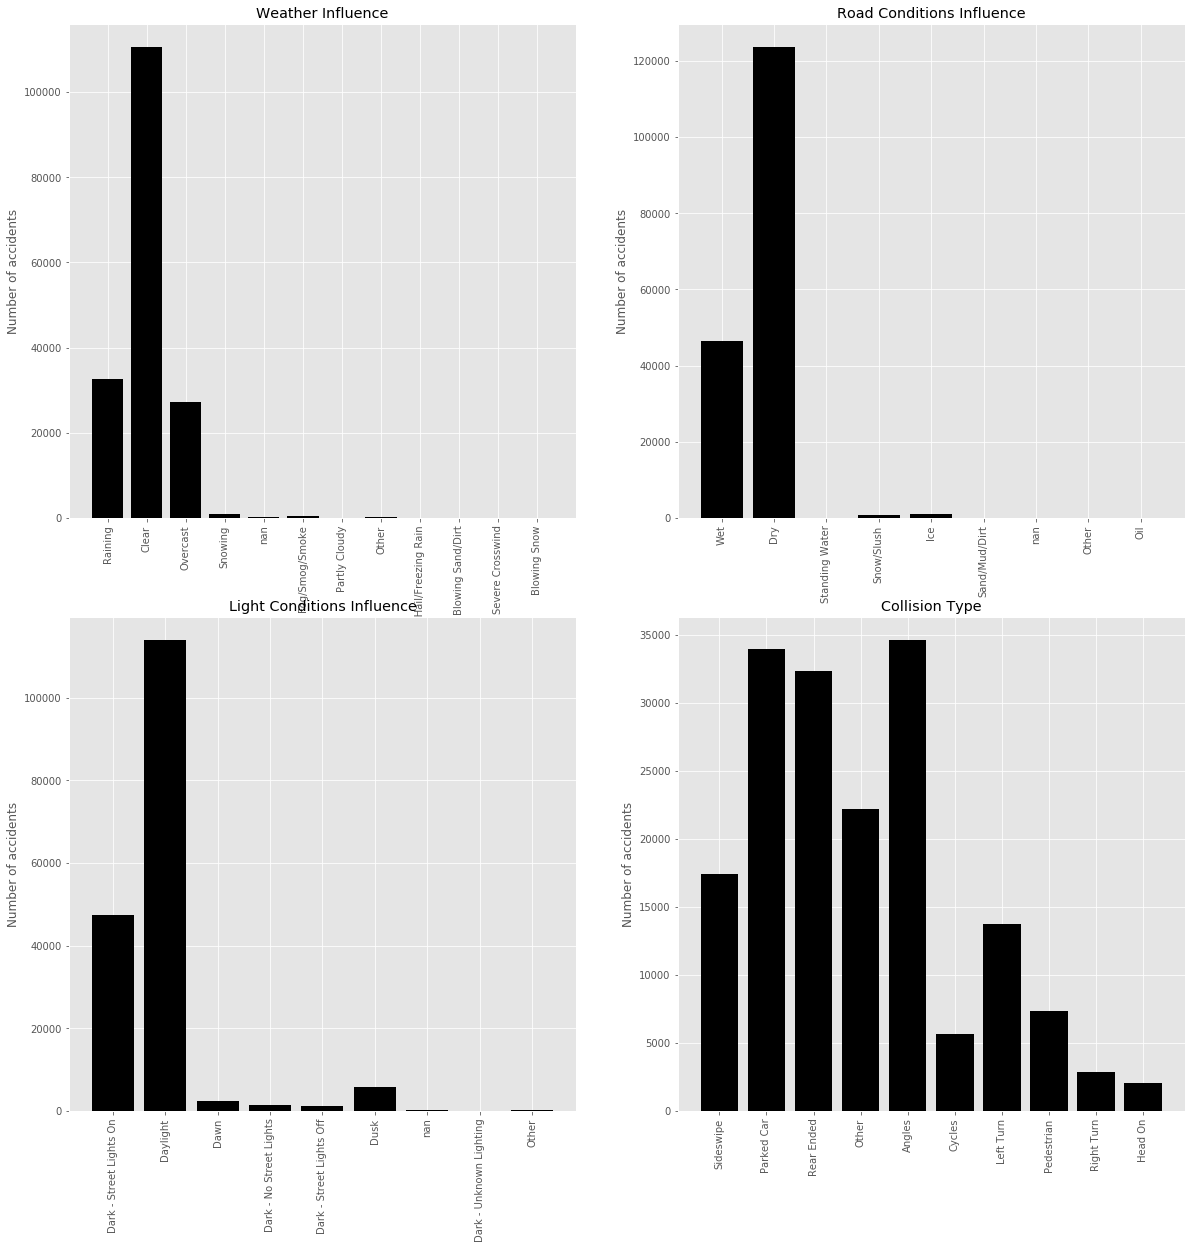

In [49]:
#Creating Plots to check environmental conditions affecting the accidents
plt.rcParams["figure.figsize"] = (20,20)
#Weather Conditions
plt.subplot(2,2,1)
freqs = Counter(df["WEATHER"])
xvals = range(len(freqs.values()))
plt.title('Weather Influence')
plt.ylabel("Number of accidents")
plt.bar(xvals, freqs.values(), color='k')
plt.xticks(xvals, freqs.keys(), rotation='vertical')

#Road Conditions
plt.subplot(2,2,2)
freqs = Counter(df["ROADCOND"])
xvals = range(len(freqs.values()))
plt.title('Road Conditions Influence')
plt.ylabel("Number of accidents")
plt.bar(xvals, freqs.values(), color='k')
plt.xticks(xvals, freqs.keys(), rotation='vertical')

#Light Conditions
plt.subplot(2,2,3)
freqs = Counter(df["LIGHTCOND"])
xvals = range(len(freqs.values()))
plt.title('Light Conditions Influence')
plt.ylabel("Number of accidents")
plt.bar(xvals, freqs.values(), color='k')
plt.xticks(xvals, freqs.keys(), rotation='vertical')

#Collision Type
plt.subplot(2,2,4)
freqs = Counter(df["COLLISIONTYPE"])
xvals = range(len(freqs.values()))
plt.title('Collision Type')
plt.ylabel("Number of accidents")
plt.bar(xvals, freqs.values(), color='k')
plt.xticks(xvals, freqs.keys(), rotation='vertical')

(array([1.71937e+05, 3.12000e+02, 1.20000e+01, 2.00000e+00, 1.00000e+00,
        1.00000e+00]),
 array([0, 1, 2, 3, 4, 5, 6]),
 <a list of 6 Patch objects>)

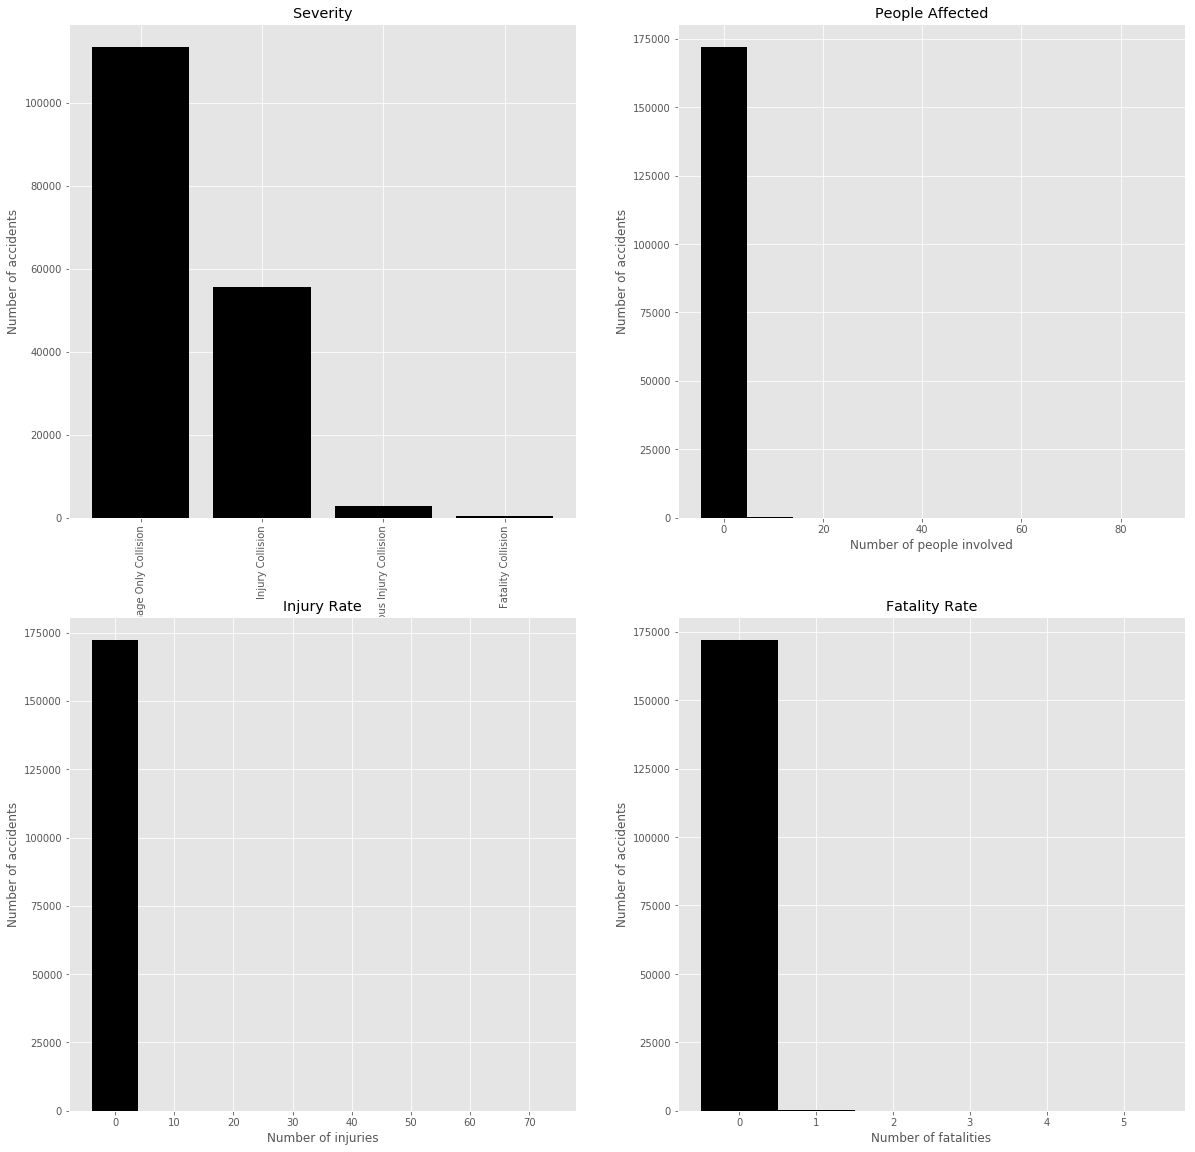

In [50]:
#Creating Plots to check Severity, People involed- injured and fatal affecting the accidents

plt.rcParams["figure.figsize"] = (20,20)
#Severity
plt.subplot(2,2,1)
freqs = Counter(df["SEVERITYDESC"])
xvals = range(len(freqs.values()))
plt.title('Severity')
plt.ylabel("Number of accidents")
plt.bar(xvals, freqs.values(), color='k')
plt.xticks(xvals, freqs.keys(), rotation='vertical')

#People affected
plt.subplot(2,2,2)
freqs = Counter(df["PERSONCOUNT"])
xvals = range(len(freqs.values()))
plt.title('People Affected')
plt.xlabel("Number of people involved")
plt.ylabel("Number of accidents")
plt.hist(df["PERSONCOUNT"], align='left', color='k')

#Injured People
plt.subplot(2,2,3)
freqs = Counter(df["INJURIES"])
xvals = range(len(freqs.values()))
plt.title('Injury Rate')
plt.xlabel("Number of injuries")
plt.ylabel("Number of accidents")
plt.hist(df["INJURIES"], align='left', color='k')

#Fatality Rate
plt.subplot(2,2,4)
freqs = Counter(df["FATALITIES"])
xvals = range(len(freqs.values()))
plt.title('Fatality Rate')
plt.xlabel("Number of fatalities")
plt.ylabel("Number of accidents")
plt.hist(df["FATALITIES"], bins=[0,1,2,3,4,5,6], align='left', color='k')

### **2.2.2. Correlation**

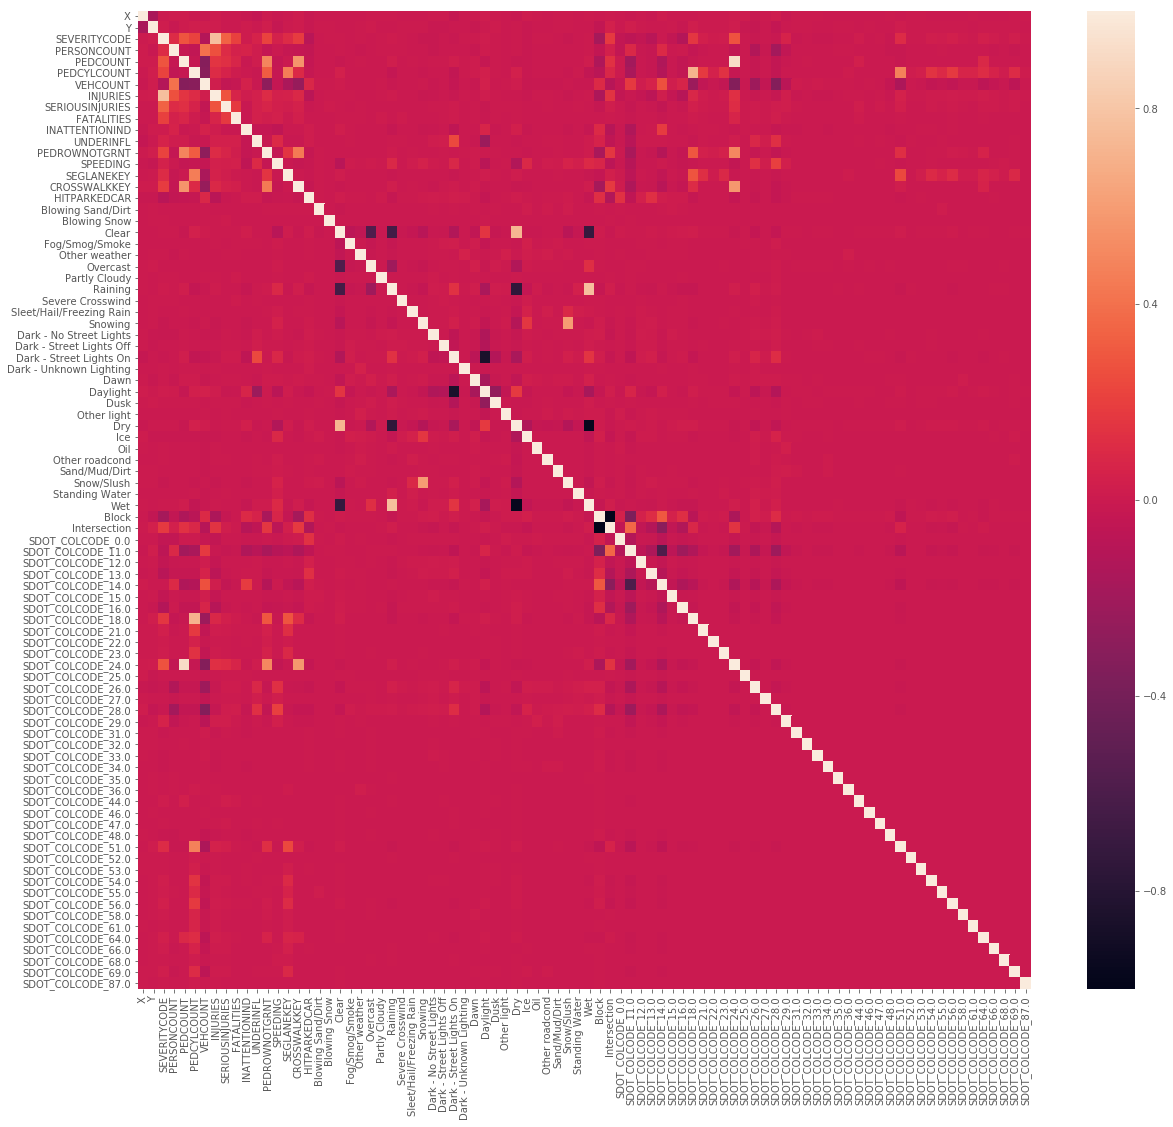

In [51]:
#Creating Heatmap for Understanding the correlation
import seaborn as sns
plt.rcParams["figure.figsize"] = (20,18)
corr = df.corr()
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

### **2.2.3. Resampling Dataset**

In [52]:
#Resampling Severity Code
from sklearn.utils import resample
sample_df = df.sample(frac=1, random_state=4)

df_1 = sample_df.loc[sample_df["SEVERITYCODE"] == 1]
df_2 = sample_df.loc[sample_df["SEVERITYCODE"] == 2]
df_3 = sample_df.loc[sample_df["SEVERITYCODE"] == 3]
df_4 = sample_df.loc[sample_df["SEVERITYCODE"] == 4]

df_1_resample = sample_df.loc[sample_df["SEVERITYCODE"] == 1].sample(n=len(df_4), random_state=42)
df_2_resample = sample_df.loc[sample_df["SEVERITYCODE"] == 2].sample(n=len(df_4), random_state=42)
df_3_resample = sample_df.loc[sample_df["SEVERITYCODE"] == 3].sample(n=len(df_4), random_state=42)
df_4_resample = df_4

df_Resampled = pd.concat([df_1_resample, df_2_resample, df_3_resample, df_4_resample])

df_Resampled.head()

X          Y  SEVERITYCODE                    SEVERITYDESC  \
185908 -122.355415  47.623272             1  Property Damage Only Collision   
156717 -122.353440  47.705078             1  Property Damage Only Collision   
133097 -122.328289  47.579809             1  Property Damage Only Collision   
44761  -122.317363  47.674979             1  Property Damage Only Collision   
26589  -122.339592  47.611629             1  Property Damage Only Collision   

       COLLISIONTYPE  PERSONCOUNT  PEDCOUNT  PEDCYLCOUNT  VEHCOUNT  INJURIES  \
185908     Sideswipe            2         0            0         2         0   
156717     Sideswipe            2         0            0         2         0   
133097         Other            1         0            0         1         0   
44761      Left Turn            2         0            0         2         0   
26589      Left Turn            4         0            0         2         0   

        SERIOUSINJURIES  FATALITIES  INATTENTIONIND  UNDERINFL WEATHER  \
185908                0           0               1          0   Clear   
156717                0           0               1          0   Clear   
133097                0           0               0          0   Clear   
44761                 0           0               0          0   Clear   
26589                 0           0               0          0   Clear   

       ROADCOND LIGHTCOND  PEDROWNOTGRNT  SPEEDING ST_COLCODE  \
185908      Dry  Daylight              0         0         11   
156717      Dry  Daylight              0         0         11   
133097      Dry  Daylight              0         0         57   
44761       Dry  Daylight              0         0         28   
26589       Dry  Daylight              0         0         28   

                                               ST_COLDESC  SEGLANEKEY  \
185908  From same direction - both going straight - bo...           0   
156717  From same direction - both going straight - bo...           0   
133097                            All other non-collision           0   
44761   From opposite direction - one left turn - one ...           0   
26589   From opposite direction - one left turn - one ...           0   

        CROSSWALKKEY  HITPARKEDCAR  Blowing Sand/Dirt  Blowing Snow  Clear  \
185908             0             0                  0             0      1   
156717             0             0                  0             0      1   
133097             0             0                  0             0      1   
44761              0             0                  0             0      1   
26589              0             0                  0             0      1   

        Fog/Smog/Smoke  Other weather  Overcast  Partly Cloudy  Raining  \
185908               0              0         0              0        0   
156717               0              0         0              0        0   
133097               0              0         0              0        0   
44761                0              0         0              0        0   
26589                0              0         0              0        0   

        Severe Crosswind  Sleet/Hail/Freezing Rain  Snowing  \
185908                 0                         0        0   
156717                 0                         0        0   
133097                 0                         0        0   
44761                  0                         0        0   
26589                  0                         0        0   

        Dark - No Street Lights  Dark - Street Lights Off  \
185908                        0                         0   
156717                        0                         0   
133097                        0                         0   
44761                         0                         0   
26589                         0                         0   

        Dark - Street Lights On  Dark - Unknown Lighting  Dawn  Daylight  \
185908                        0             

In [53]:
#Removing data with no variation

cols_no_var = df_Resampled.columns[df_Resampled.nunique() <= 1]

#Remove these from DF
for cols_no_var in cols_no_var:
    if cols_no_var in df_Resampled:
        del df_Resampled[cols_no_var]
        
print(df_Resampled.shape)

df_Resampled.head(5)

(1312, 70)


X          Y  SEVERITYCODE                    SEVERITYDESC  \
185908 -122.355415  47.623272             1  Property Damage Only Collision   
156717 -122.353440  47.705078             1  Property Damage Only Collision   
133097 -122.328289  47.579809             1  Property Damage Only Collision   
44761  -122.317363  47.674979             1  Property Damage Only Collision   
26589  -122.339592  47.611629             1  Property Damage Only Collision   

       COLLISIONTYPE  PERSONCOUNT  PEDCOUNT  PEDCYLCOUNT  VEHCOUNT  INJURIES  \
185908     Sideswipe            2         0            0         2         0   
156717     Sideswipe            2         0            0         2         0   
133097         Other            1         0            0         1         0   
44761      Left Turn            2         0            0         2         0   
26589      Left Turn            4         0            0         2         0   

        SERIOUSINJURIES  FATALITIES  INATTENTIONIND  UNDERINFL WEATHER  \
185908                0           0               1          0   Clear   
156717                0           0               1          0   Clear   
133097                0           0               0          0   Clear   
44761                 0           0               0          0   Clear   
26589                 0           0               0          0   Clear   

       ROADCOND LIGHTCOND  PEDROWNOTGRNT  SPEEDING ST_COLCODE  \
185908      Dry  Daylight              0         0         11   
156717      Dry  Daylight              0         0         11   
133097      Dry  Daylight              0         0         57   
44761       Dry  Daylight              0         0         28   
26589       Dry  Daylight              0         0         28   

                                               ST_COLDESC  SEGLANEKEY  \
185908  From same direction - both going straight - bo...           0   
156717  From same direction - both going straight - bo...           0   
133097                            All other non-collision           0   
44761   From opposite direction - one left turn - one ...           0   
26589   From opposite direction - one left turn - one ...           0   

        CROSSWALKKEY  HITPARKEDCAR  Clear  Fog/Smog/Smoke  Other weather  \
185908             0             0      1               0              0   
156717             0             0      1               0              0   
133097             0             0      1               0              0   
44761              0             0      1               0              0   
26589              0             0      1               0              0   

        Overcast  Partly Cloudy  Raining  Severe Crosswind  Snowing  \
185908         0              0        0                 0        0   
156717         0              0        0                 0        0   
133097         0              0        0                 0        0   
44761          0              0        0                 0        0   
26589          0              0        0                 0        0   

        Dark - No Street Lights  Dark - Street Lights Off  \
185908                        0                         0   
156717                        0                         0   
133097                        0                         0   
44761                         0                         0   
26589                         0                         0   

        Dark - Street Lights On  Dawn  Daylight  Dusk  Other light  Dry  Ice  \
185908                        0     0         1     0            0    1    0   
156717                        0     0         1     0            0    1    0   
133097                        0     0         1     0            0    1    0   
44761                         0     0         1     0            0    1    0   
26589                         0     0         1     0            0    1    0   

        Other roadcond  Snow/Slush  Wet  Block  Inters

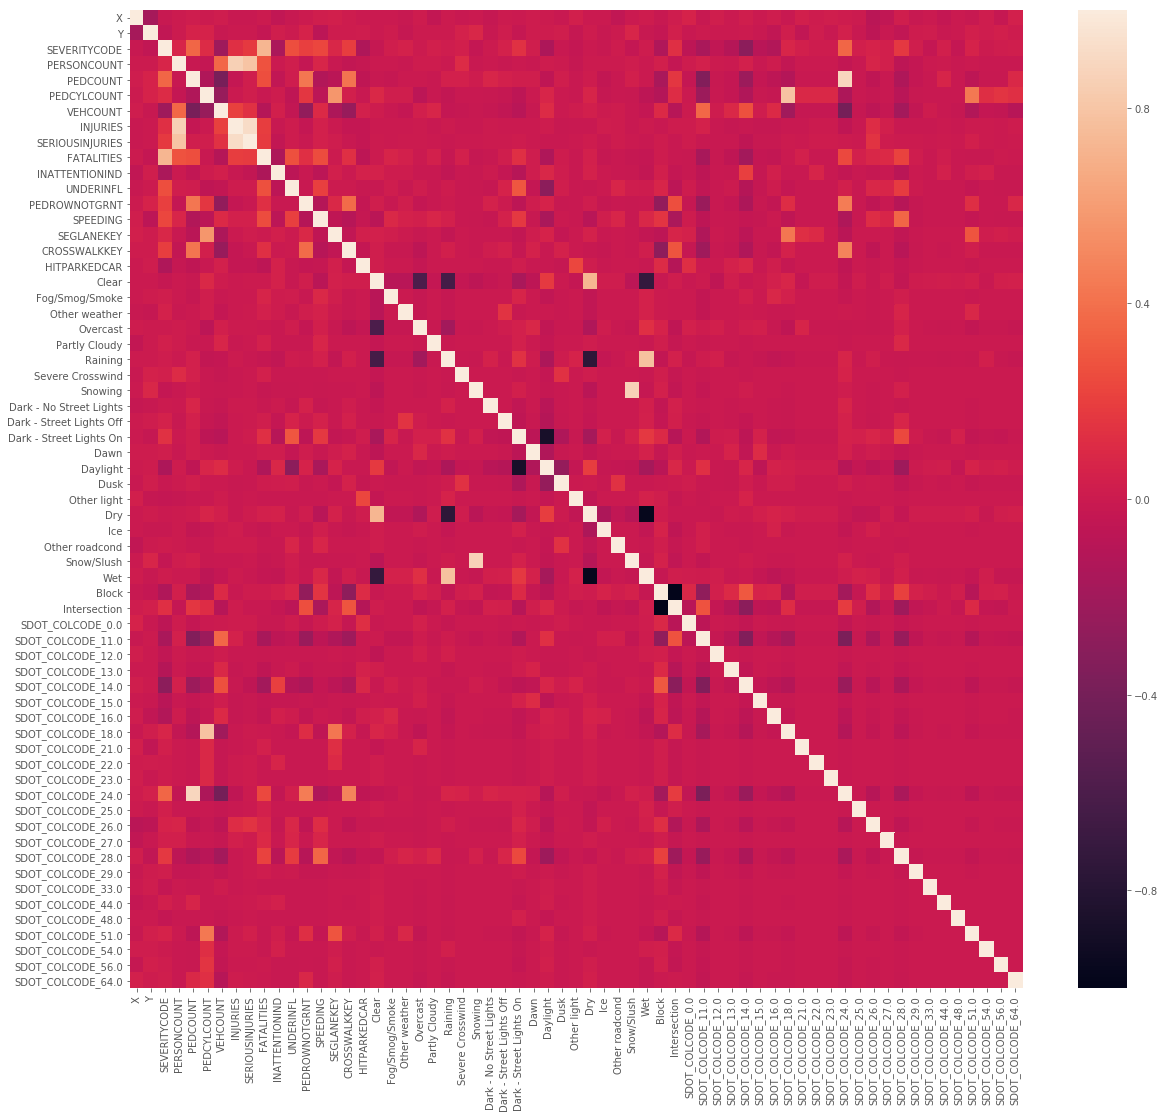

In [54]:
#Inspecting correlation after resampling

plt.rcParams["figure.figsize"] = (20,18)
corr = df_Resampled.corr()
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [55]:
list(df_Resampled.columns)

['X',
 'Y',
 'SEVERITYCODE',
 'SEVERITYDESC',
 'COLLISIONTYPE',
 'PERSONCOUNT',
 'PEDCOUNT',
 'PEDCYLCOUNT',
 'VEHCOUNT',
 'INJURIES',
 'SERIOUSINJURIES',
 'FATALITIES',
 'INATTENTIONIND',
 'UNDERINFL',
 'WEATHER',
 'ROADCOND',
 'LIGHTCOND',
 'PEDROWNOTGRNT',
 'SPEEDING',
 'ST_COLCODE',
 'ST_COLDESC',
 'SEGLANEKEY',
 'CROSSWALKKEY',
 'HITPARKEDCAR',
 'Clear',
 'Fog/Smog/Smoke',
 'Other weather',
 'Overcast',
 'Partly Cloudy',
 'Raining',
 'Severe Crosswind',
 'Snowing',
 'Dark - No Street Lights',
 'Dark - Street Lights Off',
 'Dark - Street Lights On',
 'Dawn',
 'Daylight',
 'Dusk',
 'Other light',
 'Dry',
 'Ice',
 'Other roadcond',
 'Snow/Slush',
 'Wet',
 'Block',
 'Intersection',
 'SDOT_COLCODE_0.0',
 'SDOT_COLCODE_11.0',
 'SDOT_COLCODE_12.0',
 'SDOT_COLCODE_13.0',
 'SDOT_COLCODE_14.0',
 'SDOT_COLCODE_15.0',
 'SDOT_COLCODE_16.0',
 'SDOT_COLCODE_18.0',
 'SDOT_COLCODE_21.0',
 'SDOT_COLCODE_22.0',
 'SDOT_COLCODE_23.0',
 'SDOT_COLCODE_24.0',
 'SDOT_COLCODE_25.0',
 'SDOT_COLCODE_26.0',
 

In [56]:
#Creating final Feature data set

Feature = df_Resampled.drop(["SEVERITYCODE", "SEVERITYDESC", "COLLISIONTYPE", "INJURIES","SERIOUSINJURIES","FATALITIES", "SEGLANEKEY", "CROSSWALKKEY", "WEATHER", "ROADCOND", "LIGHTCOND", "ST_COLDESC", "PERSONCOUNT", "ST_COLCODE", "HITPARKEDCAR"], axis=1)
Feature.head(5)
print(Feature.dtypes)

X                           float64
Y                           float64
PEDCOUNT                      int64
PEDCYLCOUNT                   int64
VEHCOUNT                      int64
INATTENTIONIND                int64
UNDERINFL                     int64
PEDROWNOTGRNT                 int64
SPEEDING                      int64
Clear                         uint8
Fog/Smog/Smoke                uint8
Other weather                 uint8
Overcast                      uint8
Partly Cloudy                 uint8
Raining                       uint8
Severe Crosswind              uint8
Snowing                       uint8
Dark - No Street Lights       uint8
Dark - Street Lights Off      uint8
Dark - Street Lights On       uint8
Dawn                          uint8
Daylight                      uint8
Dusk                          uint8
Other light                   uint8
Dry                           uint8
Ice                           uint8
Other roadcond                uint8
Snow/Slush                  

In [57]:
#Check null values
print(Feature.isnull().sum(axis=0))

X                           0
Y                           0
PEDCOUNT                    0
PEDCYLCOUNT                 0
VEHCOUNT                    0
INATTENTIONIND              0
UNDERINFL                   0
PEDROWNOTGRNT               0
SPEEDING                    0
Clear                       0
Fog/Smog/Smoke              0
Other weather               0
Overcast                    0
Partly Cloudy               0
Raining                     0
Severe Crosswind            0
Snowing                     0
Dark - No Street Lights     0
Dark - Street Lights Off    0
Dark - Street Lights On     0
Dawn                        0
Daylight                    0
Dusk                        0
Other light                 0
Dry                         0
Ice                         0
Other roadcond              0
Snow/Slush                  0
Wet                         0
Block                       0
Intersection                0
SDOT_COLCODE_0.0            0
SDOT_COLCODE_11.0           0
SDOT_COLCO

### **2.2.4. Preprocessing**

In [58]:
#Normalise the data

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(Feature).transform(Feature)

#SEVERITY code
Y = df_Resampled["SEVERITYCODE"].apply(lambda x: 1 if (x>2)  else 0)

#Split into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=4)
X_train.shape

(879, 55)

# 3. Modelling and Evaluation

In [59]:
#Importing packages for modelling
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [60]:
#Importing packages for evaluation
#!pip install --upgrade scikit-learn==0.22.0
from sklearn import metrics
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report, confusion_matrix

In [61]:
#Creating Function for Confusion Matrix
import itertools
def plot_confusion_matrix(cm, classes, inax,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.grid(b=None)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar(ax=inax)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if i == 0:
            ipos = i+0.25
        else:
            ipos = i-0.25
        plt.text(j, ipos, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 verticalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                fontsize=16)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## **3.1. Decision Tree**

In [62]:
#Modelling Decision Tree

Severity_Tree = DecisionTreeClassifier(criterion="entropy")
Severity_Tree.fit(X_train,Y_train)
Severity_pred_Tree = Severity_Tree.predict(X_test)

In [63]:
#Evaluation

print("Accuracy of Decision Tree model:")
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, Severity_Tree.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, Severity_pred_Tree))
print("Jaccard index: %.2f" % jaccard_similarity_score(Y_test, Severity_pred_Tree))
print("F1-score: %.2f" % f1_score(Y_test, Severity_pred_Tree, average='weighted') )
print("R2-score: %.2f" % r2_score(Severity_pred_Tree , Y_test) )
print(classification_report(Y_test, Severity_pred_Tree))

Accuracy of Decision Tree model:
Train set Accuracy:  1.0
Test set Accuracy:  0.6351039260969977
Jaccard index: 0.64
F1-score: 0.63
R2-score: -0.47
              precision    recall  f1-score   support

           0       0.62      0.68      0.65       213
           1       0.66      0.59      0.62       220

    accuracy                           0.64       433
   macro avg       0.64      0.64      0.63       433
weighted avg       0.64      0.64      0.63       433



/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:660: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [ ]:
#Visualizing Decision Tree

from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

dot_data = StringIO()
filename = "SeverityTree.png"
featureNames = Feature.columns
targetNames = str(Y.unique().tolist())
out=tree.export_graphviz(Severity_Tree,feature_names=featureNames, out_file=dot_data, class_names= targetNames, filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(800, 200))
plt.imshow(img,interpolation='nearest')

In [ ]:
#Confusion Matrix

cnf_matrix = confusion_matrix(Y_test, Severity_pred_Tree, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.rcParams["figure.figsize"] = (16, 8)
plot_confusion_matrix(cnf_matrix, classes=['SEVERITYCODE=1','SEVERITYCODE=0'], inax=plt.gca(), normalize= True,  title='Confusion Matrix (Decision Tree)', cmap=plt.cm.Reds)
plt.savefig('.Severity_confusion_matrix_DT.png', bbox_inches='tight')

## **3.2. Support Vector Machines**

In [ ]:
#Modelling

Severity_SVM = svm.SVC(kernel='linear')
Severity_SVM.fit(X_train, Y_train)
Severity_SVM_pred = Severity_SVM.predict(X_test)

In [ ]:
#Model evaluation
print("Accuracy of SVM model:")
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, Severity_SVM.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, Severity_SVM_pred))
print("Jaccard index: %.2f" % jaccard_similarity_score(Y_test, Severity_SVM_pred))
print("F1-score: %.2f" % f1_score(Y_test, Severity_SVM_pred, average='weighted') )
print("R2-score: %.2f" % r2_score(Severity_SVM_pred , Y_test) )
print(classification_report(Y_test, Severity_SVM_pred))

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, Severity_SVM_pred, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.rcParams["figure.figsize"] = (16, 8)
plot_confusion_matrix(cnf_matrix, inax=plt.gca(), classes=['SEVERITYCODE=1','SEVERITYCODE=0'],normalize= True,  title='Confusion Matrix (SVM)', cmap=plt.cm.Reds)
plt.savefig('Severity_Confusion_matrix_SVM.png', bbox_inches='tight')

## **3.3. K-Nearest Neighbour**

In [ ]:
#Modelling

Ks = 100
mean_acc = np.zeros((Ks - 1))
std_acc = np.zeros((Ks - 1))
for n in range(1, Ks):
    # Train Model and Predict
    Severity_KNN = KNeighborsClassifier(n_neighbors=n).fit(X_train, Y_train)
    Severity_KNN_predict = Severity_KNN.predict(X_test)
    mean_acc[n - 1] = metrics.accuracy_score(Y_test, Severity_KNN_predict)

    std_acc[n - 1] = np.std(Severity_KNN_predict == Y_test) / np.sqrt(Severity_KNN_predict.shape[0])
    

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

In [ ]:
#Fitting Model for best accuracy with k= 17

Severity_KNN = KNeighborsClassifier(n_neighbors=mean_acc.argmax()+1).fit(X_train, Y_train)
Severity_KNN_predict = Severity_KNN.predict(X_test)

#Evaluation

print("Accuracy of kNN model:")
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, Severity_KNN.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, Severity_KNN_predict))
print("Jaccard index: %.2f" % jaccard_similarity_score(Y_test, Severity_KNN_predict))
print("F1-score: %.2f" % f1_score(Y_test, Severity_KNN_predict, average='weighted') )
print("R2-score: %.2f" % r2_score(Severity_KNN_predict , Y_test) )
print(classification_report(Y_test, Severity_KNN_predict))

In [ ]:
#Compute Confusion Matrix
cnf_matrix = confusion_matrix(Y_test, Severity_KNN_predict, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
#plt.figure()
plt.rcParams["figure.figsize"] = (16, 8)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)

plot_confusion_matrix(cnf_matrix, inax=plt.gca(), classes=['SEVERITYCODE=1','SEVERITYCODE=0'],normalize= True,  title='Confusion Matrix (kNN)', cmap=plt.cm.Reds)
plt.savefig('Severity_confusion_matrix_kNN.png', bbox_inches='tight')

In [ ]:
#ROC CURVE
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

Severity_KNN_scores = Severity_KNN.predict_proba(X_test)
knn_fpr, knn_tpr, threshold = roc_curve(Y_test, Severity_KNN_scores[:, 1])
knn_roc_auc = auc(knn_fpr, knn_tpr)

plt.title('Receiver Operating Characteristic (KNN)')
plt.plot(knn_fpr, knn_tpr, 'b', label = 'AUC = %0.2f' % knn_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

## **3.4. Logistic Regression**

In [ ]:
#Modelling

Severity_LR = LogisticRegression(C=0.01).fit(X_train,Y_train)
Severity_LR_predict = Severity_LR.predict(X_test)

In [ ]:
#Evaluation

print("Accuracy of Logistic Regression model:")
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, Severity_LR.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, Severity_LR_predict))
print("Jaccard index: %.2f" % jaccard_similarity_score(Y_test, Severity_LR_predict))
print("F1-score: %.2f" % f1_score(Y_test, Severity_LR_predict, average='weighted') )
print("R2-score: %.2f" % r2_score(Severity_LR_predict , Y_test) )
print(classification_report(Y_test, Severity_LR_predict))

In [ ]:
#Confusion Matrix

cnf_matrix = confusion_matrix(Y_test, Severity_LR_predict, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.rcParams["figure.figsize"] = (16,8)
plot_confusion_matrix(cnf_matrix, inax=plt.gca(), classes=['SEVERITYCODE=1','SEVERITYCODE=0'],normalize= True,  title='Confusion Matrix (Logistic Regression)', cmap=plt.cm.Reds)
plt.savefig('Severity_confusion_matrix_LR.png', bbox_inches='tight')

### **THIS MARKS THE END OF CODE. PLEASE REFER TO THE REPORT FOR DETAILED DESCRIPTIONS**

[Project Link](https://github.com/Himagination/Coursera_Capstone.git)

# **THANK YOU**